<a href="https://colab.research.google.com/github/f3rry12/FGA-BigDataTraining/blob/main/sklearnVSpyspark_30data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os
os.chdir("/content/drive/My Drive/FGA Big Data Using Python - Kelas B - utk Peserta/Link Tempat Upload Tugas Minggu ke-4 Big Data Using Python Kelas B/Ferry Abu Darrin Al Ghifari_01123956151-24")
!pwd

/content/drive/.shortcut-targets-by-id/1XiNT60qajEv0-xmg6AS66hDsF00Wmpau/FGA Big Data Using Python - Kelas B - utk Peserta/Link Tempat Upload Tugas Minggu ke-4 Big Data Using Python Kelas B/Ferry Abu Darrin Al Ghifari_01123956151-24


In [ ]:
!pip install ipython-autotime
%load_ext autotime

Prediksi Stock perusahaan EA pada Data Simulasi Menggunakan Metode Regresi Linear dengan Library Pandas dan SKLearn

In [42]:
import pandas as pd
import numpy as np

EA_df = pd.read_csv('Data_Generate_EA.csv').head(30)
EA_df

,CountAll,CountPositiveReview,CountNegativeReview,StockOpen
0,145014,13381,14769,142.293425
1,281176,19494,8061,150.383129
2,210040,19843,13941,152.245408
3,42657,11870,10785,162.935588
4,165595,10452,19579,146.690897
5,91121,16369,15832,142.517235
6,130699,3558,2830,125.659194
7,49214,5410,8864,128.342465
8,64814,8556,13185,147.215240
9,134927,12793,4475,160.656102


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import time

In [46]:
#Modelling
#Pertama, buat variabel x dan y
x = EA_df['CountAll'].values.reshape(-1,1)
y = EA_df['StockOpen'].values.reshape(-1,1)
#Kedua, kita split data kita menjadi training and testing dengan porsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
#cari tau nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)
#accuracy score
print("akurasi: ",lin_reg.score(x_test, y_test))

[[3.07713508e-05]]
[139.92383374]
akurasi:  -0.034447842323666045
time: 21.1 ms (started: 2021-08-17 10:17:18 +00:00)


Text(0.5, 1.0, 'All Count vs Stock Open')

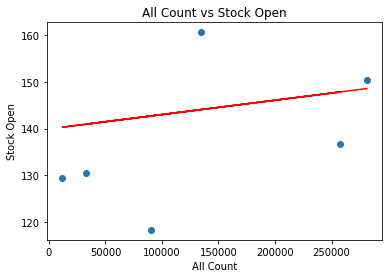

time: 215 ms (started: 2021-08-17 10:17:32 +00:00)


In [47]:
import matplotlib.pyplot as plt
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('All Count')
plt.ylabel('Stock Open')
plt.title('All Count vs Stock Open')

Prediksi Stock perusahaan EA pada Data Simulasi Menggunakan Metode Regresi Linear dengan PySpark

In [32]:
!pip install pyspark

     |████████████████████████████████| 212.4 MB 61 kB/s 
     |████████████████████████████████| 198 kB 56.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=003f98e95edca23008d07688f12df2c278364c3e531ad2fd7935173b43f82338
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark


In [55]:
from pyspark import SQLContext, SparkConf, SparkContext
from pyspark.sql import SparkSession
sc = SparkContext.getOrCreate()
if (sc is None):
    sc = SparkContext(master="local[*]", appName="Linear Regression")
spark = SparkSession(sparkContext=sc)
sqlcontext = SQLContext(sc)
data = sqlcontext.read.csv('Data_Generate_EA.csv', header = True, inferSchema = True)

time: 525 ms (started: 2021-08-17 10:22:30 +00:00)


In [56]:
data.show()

+--------+-------------------+-------------------+-----------+
|CountAll|CountPositiveReview|CountNegativeReview|  StockOpen|
+--------+-------------------+-------------------+-----------+
|  145014|              13381|              14769|142.2934255|
|  281176|              19494|               8061|150.3831291|
|  210040|              19843|              13941| 152.245408|
|   42657|              11870|              10785|162.9355878|
|  165595|              10452|              19579|146.6908973|
|   91121|              16369|              15832|142.5172347|
|  130699|               3558|               2830|125.6591944|
|   49214|               5410|               8864|128.3424647|
|   64814|               8556|              13185|147.2152399|
|  134927|              12793|               4475|160.6561018|
|  161991|              15617|              11643|153.1640053|
|  132831|              19824|              18773|124.2128667|
|  181591|               8786|              10793|163.8

In [58]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

time: 1.54 ms (started: 2021-08-17 10:22:48 +00:00)


In [59]:
# defining Salary as our label/predictor variable
dataset = data.select(data.CountAll, data.StockOpen.alias('label'))
# split data into 70% training and 30% testing data
training, test = dataset.randomSplit([0.8, 0.2], seed = 100)
# assembler to assemble the features into vector form
assembler = VectorAssembler().setInputCols(['CountAll',]).setOutputCol('features')
trainingSet = assembler.transform(training)
# select only features column and label column since we have already vectorised our features
trainingSet = trainingSet.select("features","label")
# fit the training set to linear regression model
lr = LinearRegression()
lr_Model = lr.fit(trainingSet)
# assembler to assemble the features into vector form
testSet = assembler.transform(test)
# select only features column and label column since we have already vectorised our features
testSet = testSet.select("features", "label")
# fit the testing data into our linear regression model
testSet = lr_Model.transform(testSet)
testSet.show(truncate=False)
evaluator = RegressionEvaluator()
print("akurasi: ",evaluator.evaluate(testSet, {evaluator.metricName: "r2"}))

+----------+-----------+------------------+
|features  |label      |prediction        |
+----------+-----------+------------------+
|[42657.0] |162.9355878|136.59287713035576|
|[121763.0]|144.3718015|141.99544466718396|
|[141286.0]|118.1338827|143.32877369433106|
|[173044.0]|130.8511201|145.49769564506286|
|[215620.0]|150.3774497|148.40543608760828|
|[281176.0]|150.3831291|152.88260238908111|
+----------+-----------+------------------+

akurasi:  -0.22370977491690014
time: 881 ms (started: 2021-08-17 10:22:53 +00:00)


Prediksi Stock perusahaan EA pada Data Simulasi Crawling dan API Stock  Menggunakan Metode Regresi Linear dengan Library Pandas dan SKLearn

API Stock EA daily: (data dimulai sejak tanggal 7/1/2021)
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=EA&apikey=INSERTYOURKEYHERE&datatype=csv

In [60]:
EA_daily_df = pd.read_csv('Data_Generated_daily_adjusted_EA.csv').head(30)
EA_daily_df

,CountAll,CountPositiveReview,CountNegativeReview,StockOpen
0,145014,13381,14769,143.460
1,281176,19494,8061,143.290
2,210040,19843,13941,143.540
3,42657,11870,10785,144.090
4,165595,10452,19579,141.320
5,91121,16369,15832,139.550
6,130699,3558,2830,142.550
7,49214,5410,8864,143.440
8,64814,8556,13185,143.310
9,134927,12793,4475,143.350


time: 354 ms (started: 2021-08-17 10:23:48 +00:00)


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

time: 1.12 ms (started: 2021-08-17 10:24:00 +00:00)


In [63]:
#Modelling
#Pertama, buat variabel x dan y
x = EA_daily_df['CountAll'].values.reshape(-1,1)
y = EA_daily_df['StockOpen'].values.reshape(-1,1)

#Kedua, kita split data kita menjadi training and testing dengan porsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

#cari tau nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

#accuracy score
print("akurasi : ", lin_reg.score(x_test, y_test))

[[-6.50845098e-06]]
[142.6983072]
akurasi :  -0.36671964666507617
time: 19.5 ms (started: 2021-08-17 10:24:01 +00:00)


Text(0.5, 1.0, 'All Count vs Stock Open')

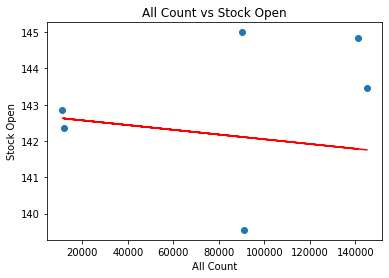

time: 199 ms (started: 2021-08-17 10:24:10 +00:00)


In [64]:
import matplotlib.pyplot as plt
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('All Count')
plt.ylabel('Stock Open')
plt.title('All Count vs Stock Open')

Prediksi Stock perusahaan EA pada Data Simulasi Crawling dan API Stock Menggunakan Metode Regresi Linear dengan Library PySpark

In [65]:
from pyspark import SQLContext, SparkConf, SparkContext
from pyspark.sql import SparkSession
sc = SparkContext.getOrCreate()
if (sc is None):
    sc = SparkContext(master="local[*]", appName="Linear Regression")
spark = SparkSession(sparkContext=sc)
sqlcontext = SQLContext(sc)
data = sqlcontext.read.csv('Data_Generated_daily_adjusted_EA.csv', header = True, inferSchema = True)

time: 275 ms (started: 2021-08-17 10:24:24 +00:00)


In [66]:
data.show()

+--------+-------------------+-------------------+---------+
|CountAll|CountPositiveReview|CountNegativeReview|StockOpen|
+--------+-------------------+-------------------+---------+
|  145014|              13381|              14769|   143.46|
|  281176|              19494|               8061|   143.29|
|  210040|              19843|              13941|   143.54|
|   42657|              11870|              10785|   144.09|
|  165595|              10452|              19579|   141.32|
|   91121|              16369|              15832|   139.55|
|  130699|               3558|               2830|   142.55|
|   49214|               5410|               8864|   143.44|
|   64814|               8556|              13185|   143.31|
|  134927|              12793|               4475|   143.35|
|  161991|              15617|              11643|   142.63|
|  132831|              19824|              18773|   143.05|
|  181591|               8786|              10793|   141.35|
|  157180|              

In [67]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

time: 2.28 ms (started: 2021-08-17 10:24:31 +00:00)


In [68]:
# defining Salary as our label/predictor variable
dataset = data.select(data.CountAll, data.StockOpen.alias('label'))
# split data into 70% training and 30% testing data
training, test = dataset.randomSplit([0.8, 0.2], seed = 100)
# assembler to assemble the features into vector form
assembler = VectorAssembler().setInputCols(['CountAll',]).setOutputCol('features')
trainingSet = assembler.transform(training)
# select only features column and label column since we have already vectorised our features
trainingSet = trainingSet.select("features","label")
# fit the training set to linear regression model
lr = LinearRegression()
lr_Model = lr.fit(trainingSet)
# assembler to assemble the features into vector form
testSet = assembler.transform(test)
# select only features column and label column since we have already vectorised our features
testSet = testSet.select("features", "label")
# fit the testing data into our linear regression model
testSet = lr_Model.transform(testSet)
testSet.show(truncate=False)
evaluator = RegressionEvaluator()
print("akurasi : ",evaluator.evaluate(testSet, {evaluator.metricName: "r2"}))

+----------+------+------------------+
|features  |label |prediction        |
+----------+------+------------------+
|[42657.0] |144.09|142.41351647802094|
|[121763.0]|142.64|142.16336457318005|
|[141286.0]|144.83|142.10162822400036|
|[173044.0]|136.47|142.00120190748913|
|[215620.0]|136.11|141.86656651320163|
|[281176.0]|143.29|141.65926291709326|
+----------+------+------------------+

akurasi :  -0.008269146084644019
time: 752 ms (started: 2021-08-17 10:24:34 +00:00)
